In [ ]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Polynomial_train.csv to Polynomial_train.csv


In [ ]:
df=pd.read_csv("Polynomial_train.csv",index_col=0)
df.head()

,X,Y,Z,label
0,0.643715,-9.866550,-5.836019,307.972927
1,-1.366446,-3.761945,-8.756162,136.398375
2,-4.090270,-1.836218,-1.846066,-310.724813
3,-8.730478,-1.923651,3.892972,1.755447
4,5.367169,0.358357,6.703989,-343.582590


In [ ]:
xa=df.drop(["label"],axis=1)

In [ ]:
xa

,X,Y,Z
0,0.643715,-9.866550,-5.836019
1,-1.366446,-3.761945,-8.756162
2,-4.090270,-1.836218,-1.846066
3,-8.730478,-1.923651,3.892972
4,5.367169,0.358357,6.703989
...,...,...,...
49995,2.693877,-1.362685,-7.392968
49996,-9.270188,-5.456920,-2.343480
49997,6.616753,-2.847288,-0.504040
49998,3.558199,4.507526,-4.823674


In [ ]:
ya=df[['label']]
ya

In [ ]:
xa['X*Y'] = xa.X * xa.Y

In [ ]:
xa['Y*Z'] = xa.Y * xa.Z

In [ ]:
xa['X*Z'] = xa.X * xa.Z

In [ ]:
xa['X*X'] = xa.X * xa.X

In [ ]:
xa['Y*Y'] = xa.Y* xa.Y


In [ ]:
xa['Z*Z'] = xa.Z * xa.Z

In [ ]:
xa

In [ ]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(xa)
xa_norm = norm.transform(xa)

In [ ]:
def linear_reg_model(X,Y,alpha,iteration):
  m = X.shape[0]
  ones = np.ones((m,1),dtype = float)
  costlist =[]
  X = np.concatenate((ones,X),axis = 1)
  n = X.shape[1] 
  theta = np.ones((n,1),dtype=float)
  for i in range(iteration): 
    h =np.dot(X,theta)
    error = h-Y
    sqerror = np.square(h-Y)
    cost = 1/(2*m)*(np.sum(sqerror))
    costlist.append(cost)
    theta = theta-(alpha/m)*(np.dot(X.transpose(),error))
    if i%100 == 0:
      print ("cost= {}".format(costlist))

  return costlist,theta

In [ ]:
costlist,theta = linear_reg_model(xa_norm,ya,0.1,10000)
print(theta)

In [ ]:
print(costlist)

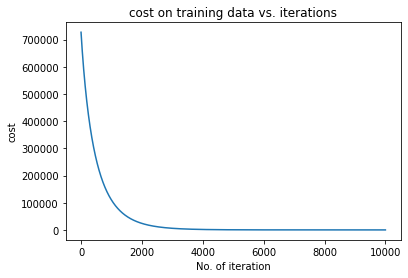

In [ ]:
plt.title("cost on training data vs. iterations") 
plt.xlabel("No. of iteration") 
plt.ylabel("cost") 
plt.plot(costlist) 
plt.show()

In [ ]:
uploaded = files.upload()

Saving Polynomial_test.csv to Polynomial_test.csv


In [ ]:
dft=pd.read_csv("Polynomial_test.csv",index_col = 0)
dft.head()

,X,Y,Z,label
0,9.322078,0.413096,5.984731,-657.669309
1,2.811964,6.142752,6.419237,-545.362524
2,-2.669784,7.775091,-6.931907,-75.044187
3,-6.992156,-9.205548,0.852580,-2403.124902
4,1.574294,-2.213266,6.029188,8.595325


In [ ]:
x_test = dft.drop(["label"],axis = 1) 

In [ ]:
x_test['X*Y'] = x_test.X * x_test.Y
x_test['Y*Z'] = x_test.Y * x_test.Z
x_test['X*Z'] = x_test.X * x_test.Z
x_test['X*X'] = x_test.X * x_test.X
x_test['Y*Y'] = x_test.Y* x_test.Y
x_test['Z*Z'] = x_test.Z * x_test.Z



In [ ]:
xa

In [ ]:
y_test = dft[['label']]

In [ ]:
ones = np.ones((x_test.shape[0],1),dtype= int)

In [ ]:
x_test = np.concatenate((ones,x_test),axis = 1)

In [ ]:
np.shape(x_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(x_test)
x_test_norm = norm.transform(x_test)

In [ ]:
y_pred = np.dot(x_test_norm,theta)

In [ ]:
d = y_test-y_pred
rootmeansq = ((np.dot(np.transpose(d),d))/10000)**(0.5)
rootmeansq